In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [2]:
import subprocess

def runcmd(cmd, verbose = False, *args, **kwargs):

    process = subprocess.Popen(
        cmd,
        stdout = subprocess.PIPE,
        stderr = subprocess.PIPE,
        text = True,
        shell = True
    )
    std_out, std_err = process.communicate()
    if verbose:
        print(std_out.strip(), std_err)
    pass

runcmd('echo "Hello, World!"', verbose = True)

"Hello, World!" 


## Downloading the data

In [3]:
runcmd("wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv", verbose = True)

 --2022-10-20 23:47:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5827 (5,7K) [text/csv]
Saving to: 'drug200.csv'

     0K .....                                                 100% 1,70G=0s

2022-10-20 23:47:48 (1,70 GB/s) - 'drug200.csv' saved [5827/5827]




Exploring the data

In [4]:
df=pd.read_csv('drug200.csv')

In [5]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


The data consists of several information regarding the age, sex, blood pressure(BP), cholesterol, drugs, and how the patients respond to the drugs.

In [6]:
df.shape

(200, 6)

The data consists of 200 patients with 6 informations.

In [7]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

Sklearn decision trees does not read categorical data such as Sex, BP, and Cholesterol. Thus we must change the data into numerical values by using pd.get_dummies() or preprocessing.LabelEncoder to convert the category into dummy numerics.

In [8]:
from sklearn import preprocessing
le_sex=preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])

In [9]:
X[0:5]

array([[23, 0, 'HIGH', 'HIGH', 25.355],
       [47, 1, 'LOW', 'HIGH', 13.093],
       [47, 1, 'LOW', 'HIGH', 10.114],
       [28, 0, 'NORMAL', 'HIGH', 7.798],
       [61, 0, 'LOW', 'HIGH', 18.043]], dtype=object)

In [10]:
df["Cholesterol"].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

So F=0 and M=1, continue for BP and Cholesterol.

In [11]:
le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])

In [12]:
le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

Target Variable

In [13]:
y=df["Drug"]
y[0:5]
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

## Setting the decision tree

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
??train_test_split

In [16]:
X_trainset, X_testset, y_trainset, y_testset=train_test_split(X, y, test_size=0.3, random_state=3)

In [17]:
X_trainset, X_testset, y_trainset, y_testset

(array([[26, 0, 0, 1, 19.161],
        [41, 0, 2, 1, 22.905],
        [28, 0, 2, 0, 19.675],
        [19, 0, 0, 0, 13.313],
        [50, 1, 2, 1, 15.79],
        [24, 1, 2, 0, 25.786],
        [72, 1, 1, 0, 16.31],
        [74, 0, 1, 0, 20.942],
        [37, 0, 1, 1, 12.006],
        [31, 1, 0, 1, 17.069],
        [22, 0, 2, 0, 8.607],
        [20, 0, 2, 1, 9.281],
        [28, 0, 1, 0, 13.127],
        [59, 0, 2, 0, 13.884],
        [15, 1, 0, 1, 17.206],
        [51, 0, 1, 1, 23.003],
        [45, 1, 1, 1, 10.017],
        [33, 0, 1, 0, 33.486],
        [39, 1, 0, 0, 9.664],
        [29, 0, 0, 0, 29.45],
        [60, 1, 2, 0, 15.171],
        [24, 0, 0, 1, 18.457],
        [49, 0, 2, 1, 9.381],
        [37, 1, 1, 1, 8.968],
        [32, 0, 0, 1, 10.292],
        [21, 0, 0, 1, 28.632],
        [23, 1, 2, 0, 12.26],
        [40, 1, 0, 0, 27.826],
        [38, 1, 1, 0, 18.295],
        [47, 1, 1, 1, 30.568],
        [22, 0, 0, 1, 22.818],
        [47, 1, 0, 0, 10.403],
        [30, 0, 2

In [18]:
print('Shape of X test {}'.format(X_testset.shape),'&','Shape of y test {}'.format(y_testset.shape))

Shape of X test (60, 5) & Shape of y test (60,)


## Modelling

In [19]:
drugtree=DecisionTreeClassifier(criterion='entropy', max_depth=4)
drugtree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [20]:
clf=drugtree.fit(X_trainset, y_trainset)

## Prediction

Let's make prediction using the model above on the test data set and store it into a variable predTree.

In [21]:
predTree=drugtree.predict(X_testset)

In [22]:
print(predTree)
print(y_testset)

['drugY' 'drugX' 'drugX' 'drugX' 'drugX' 'drugC' 'drugY' 'drugA' 'drugB'
 'drugA' 'drugY' 'drugA' 'drugY' 'drugY' 'drugX' 'drugY' 'drugX' 'drugX'
 'drugB' 'drugX' 'drugX' 'drugY' 'drugY' 'drugY' 'drugX' 'drugB' 'drugY'
 'drugY' 'drugA' 'drugX' 'drugB' 'drugC' 'drugC' 'drugX' 'drugX' 'drugC'
 'drugY' 'drugX' 'drugX' 'drugX' 'drugA' 'drugY' 'drugC' 'drugY' 'drugA'
 'drugY' 'drugY' 'drugY' 'drugY' 'drugY' 'drugB' 'drugX' 'drugY' 'drugX'
 'drugY' 'drugY' 'drugA' 'drugX' 'drugY' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
82     drugC
183    drugY
46     drugA
70     drugB
100    drugA
179    drugY
83     drugA
25     drugY
190    drugY
159    drugX
173    drugY
95     drugX
3      drugX
41     drugB
58     drugX
14     drugX
143    drugY
12     drugY
6      drugY
182    drugX
161    drugB
128    drugY
122    drugY
101    drugA
86     drugX
64     drugB
47     drugC
158    drugC
34     drugX
38     drugX
196    drugC
4      drugY
72     drugX
67     drugX
145  

The first 5 are okay as we could see, but let's evaluate the overall performance of the model.

## Evaluate The Model

For model evaluation, we will use metrics from sklearn to check the accuracy of the model.

In [23]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [24]:
print("DecisionTree's Accuracy:", metrics.accuracy_score(y_testset, predTree))

DecisionTree's Accuracy: 0.9833333333333333


The closer the value to 1, the closer it matches with the testset, implying better accuracy.

# Visualizing The Tree

First, let's install the packages and import them

In [25]:
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

In [26]:
?tree.plot_tree

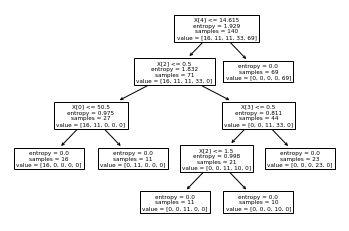

In [27]:
tree.plot_tree(drugtree)
plt.show()

In [28]:
with open("drug200.csv", 'w') as f:  
    f = tree.export_graphviz(clf, out_file=f)  

In [29]:
import os
os.unlink('drug200.csv')

In [30]:
import pydotplus
dot_data=tree.export_graphviz(clf, out_file=None)
graph2=pydotplus.graph_from_dot_data(dot_data)
graph2.write("drug200.csv.pdf")

True

In [31]:
feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']

In [32]:
target_names=['drugA','drugB', 'drugC', 'drugX', 'drugY']

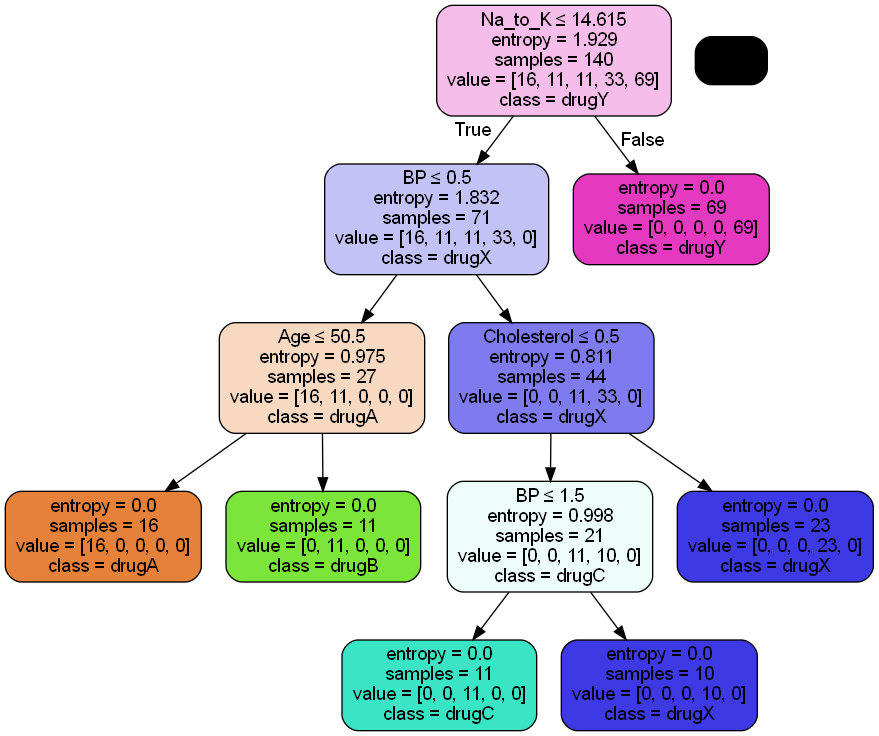

In [33]:
from IPython.display import Image
dot_data=tree.export_graphviz(clf, out_file=None,  
                     feature_names=feature_names, class_names=target_names, filled=True, rounded=True,  # leaves_parallel=True, 
                     special_characters=True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
nodes = graph2.get_node_list()
Image(graph2.create_png() ) 

Notes:
1) Everytime a split happens, we try to increase the purity of the prediction by using a certain criteria in each nodes.

2) With the accuracy of 0.98 is quite accurate. Below I also make sure that the classification is correct by filtering out data via conditions.

3) Drug A is for those who have Na_to_K lower than or equals to 14.6, High BP, and younger or at age 50, while Drug Y is for those who have Na_to_K higher than 14.6.

Numeric value interpretation:

BP: High=0, Low=1, Normal=2

Cholesterol: High=1, Normal=0

## Making sure that our labelling of drug classification is correct

In [34]:
newdf = df[(df.Drug == "drugA")] #reading the graph,check whether BP of patients for drug A and B is equals to 0, which is High.
drugXBP=newdf['BP'].value_counts()
newdf2 = df[(df.Drug == "drugB")]
drugBBP=newdf2['BP'].value_counts()
print("BP of Drug X:",drugXBP,"& BP of Drug B", drugBBP)

BP of Drug X: HIGH    23
Name: BP, dtype: int64 & BP of Drug B HIGH    16
Name: BP, dtype: int64


In [36]:
newdf = df[(df.Drug == "drugA")] #reading the graph,check whether Age of patients for drug A is less or equals to 50, and B otherwise.
drugXAge=newdf['Age'].value_counts()
newdf2 = df[(df.Drug == "drugB")]
drugBAge=newdf2['Age'].value_counts()
print("Age of Drug X:",
      drugXAge,
      "& Age of Drug B", drugBAge)

Age of Drug X: 31    2
49    2
32    2
43    1
35    1
47    1
48    1
42    1
20    1
26    1
39    1
50    1
45    1
38    1
19    1
36    1
29    1
24    1
37    1
23    1
Name: Age, dtype: int64 & Age of Drug B 60    3
68    2
70    2
74    1
58    1
65    1
59    1
72    1
53    1
55    1
51    1
57    1
Name: Age, dtype: int64


It is as classified by the model.